#### Extracting Reviews from an Amazon product link:

In [19]:
from selenium import webdriver

In [20]:
driver = webdriver.Chrome("/usr/bin/chromedriver")


driver.get("https://www.amazon.in/Apple-iPhone-13-Mini-256GB/dp/B09G99CW2C/ref=sr_1_6?keywords=iphone%2B13&qid=1665947049&qu=eyJxc2MiOiI0LjU4IiwicXNhIjoiNC4wNCIsInFzcCI6IjMuNDQifQ%3D%3D&sprefix=iphon%2Caps%2C267&sr=8-6&th=1")

driver.find_elements("xpath", "//a[@data-hook='see-all-reviews-link-foot']")[0].click()


next_page = driver.find_elements("xpath", "//li[@class='a-last']")
reviews = []
while next_page:
    reviews.extend([i.text for i in driver.find_elements("xpath","//div[@data-hook='review']")])
    next_page[0].click()
    driver.refresh()
    next_page = driver.find_elements("xpath", "//li[@class='a-last']")

driver.close()


/tmp/ipykernel_1396059/40630724.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver")


In [21]:
len(reviews)

210

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [23]:
only_reviews = []
for i in reviews:
    only_reviews.append(i.split("\n")[4])

In [24]:
only_reviews[:5]

['Best',
 'Delivered on time and the product was as per specs. No cheating.',
 'Let me sum up my mind here. I hate Iphones. I used to have an work phone (Iphone SE).',
 'Pros:',
 'Nice and small phone. Good for showing off.']

#### Wordcloud of the reviews

In [25]:
words = []
for i in only_reviews:
    words.extend(i.split(" "))

In [26]:
words[:5]

['Best', 'Delivered', 'on', 'time', 'and']

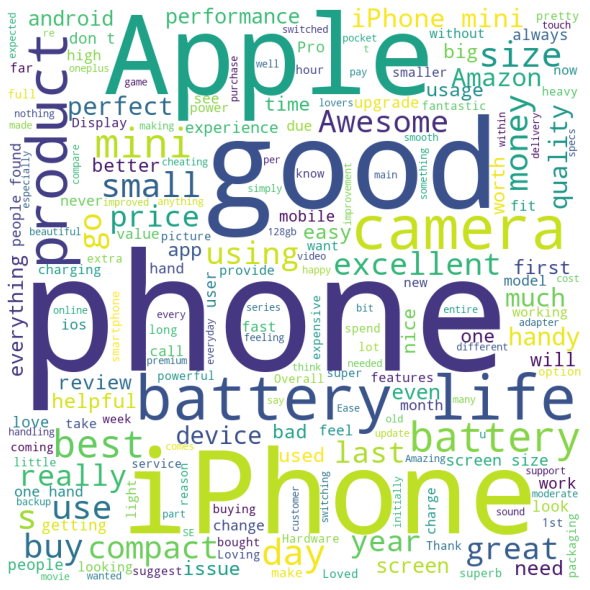

In [27]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(" ".join(words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Sentiment Analysis of the reviews

In [28]:
from transformers import pipeline

In [29]:
sentiment_pipeline = pipeline("sentiment-analysis")
sentiments = sentiment_pipeline(only_reviews)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [30]:
sentiments[:5]

[{'label': 'POSITIVE', 'score': 0.9997941851615906},
 {'label': 'POSITIVE', 'score': 0.9839375615119934},
 {'label': 'POSITIVE', 'score': 0.9580745100975037},
 {'label': 'POSITIVE', 'score': 0.9992159605026245},
 {'label': 'POSITIVE', 'score': 0.9991807341575623}]

In [31]:
pos = []
neg = []

for i in sentiments:
    if i["label"] == "POSITIVE":
        pos.append(i["score"])
    else:
        neg.append(i["score"])



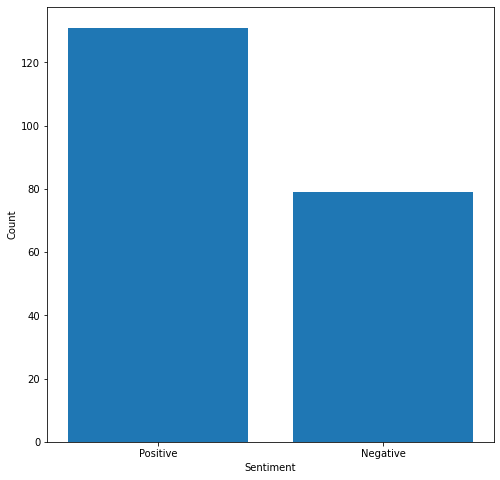

In [32]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.bar(["Positive", "Negative"], [len(pos), len(neg)])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()